In [127]:
import requests, json
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

cases_by_zip_url = "https://gis-public.sandiegocounty.gov/arcgis/rest/services/Hosted/COVID_19_Statistics__by_ZIP_Code/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"


In [62]:
response = requests.get(cases_by_zip_url)
data = response.json()
#data is in dict format

In [37]:
data.keys()

dict_keys(['exceededTransferLimit', 'features', 'fields', 'geometryType', 'spatialReference', 'globalIdFieldName', 'objectIdFieldName', 'hasZ', 'hasM'])

In [49]:
data["features"][1]

{'attributes': {'objectid': 1081,
  'zipcode_zip': 91906,
  'ziptext': '91906',
  'case_count': None,
  'updatedate': 1586505600000,
  'created_user': 'John.Taylor@sdcounty.ca.gov',
  'created_date': 1586646600000,
  'last_edited_user': 'John.Taylor@sdcounty.ca.gov',
  'last_edited_date': 1586646600000,
  'globalid': '{B3B30588-FE04-4679-A8F0-C228A4F3BA50}',
  'rate_100k': None,
  'test_positive': None,
  'test_neg': None,
  'test_ind': None,
  'test_total': None,
  'test_100k': None,
  'testspctpositive': None},
 'geometry': {'x': -116.46968055286347, 'y': 32.66042735240326}}

In [60]:
data["features"][1]["attributes"]
#updatedate is April 10, 2020
#created_date is April 11, 2020

{'objectid': 1081,
 'zipcode_zip': 91906,
 'ziptext': '91906',
 'case_count': None,
 'updatedate': 1586505600000,
 'created_user': 'John.Taylor@sdcounty.ca.gov',
 'created_date': 1586646600000,
 'last_edited_user': 'John.Taylor@sdcounty.ca.gov',
 'last_edited_date': 1586646600000,
 'globalid': '{B3B30588-FE04-4679-A8F0-C228A4F3BA50}',
 'rate_100k': None,
 'test_positive': None,
 'test_neg': None,
 'test_ind': None,
 'test_total': None,
 'test_100k': None,
 'testspctpositive': None}

In [54]:
data["features"][1]["attributes"]["ziptext"]


'91906'

In [57]:
data["features"][1999]["attributes"]
#updatedate: April 7, 2020 - the day the cases were reported
#create data: April 11, 2020 - not useful

{'objectid': 771,
 'zipcode_zip': 92014,
 'ziptext': '92014',
 'case_count': 13,
 'updatedate': 1586246400000,
 'created_user': 'Ross.Martin@sdcounty.ca.gov',
 'created_date': 1586630625000,
 'last_edited_user': 'Ross.Martin@sdcounty.ca.gov',
 'last_edited_date': 1586630625000,
 'globalid': '{B15617F1-351C-43BB-8B69-7C6869FCD333}',
 'rate_100k': None,
 'test_positive': None,
 'test_neg': None,
 'test_ind': None,
 'test_total': None,
 'test_100k': None,
 'testspctpositive': None}

In [75]:
Zipcases = pd.read_csv("Datasets/COVID-19_Case_Statistics_by_ZIP_Code.csv")
Zipcases

,X,Y,objectid,zipcode_zip,ziptext,case_count,updatedate,created_user,created_date,last_edited_user,last_edited_date,globalid,rate_100k,test_positive,test_neg,test_ind,test_total,test_100k,testspctpositive
0,-1.299049e+07,3.869543e+06,1,91901.0,91901,1.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{87C2AEFB-2AB8-473D-BE60-B021F0AD990A},NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.302606e+07,3.851793e+06,2,91902.0,91902,9.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{0BBF31F5-A98F-4A42-869E-F425379D6BA8},NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.303169e+07,3.847143e+06,3,91910.0,91910,23.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{94FEB6AB-AB77-4534-9692-CF8DFC823461},NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.302997e+07,3.843296e+06,4,91911.0,91911,21.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{83793CC0-427A-4747-9BDD-5D79A947C3FF},NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.302299e+07,3.844480e+06,5,91913.0,91913,20.0,2020/04/01 08:00:00+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,Ross.Martin@sdcounty.ca.gov,2020/04/11 18:43:45+00,{597D4C08-7AD1-49D2-811D-D54EE7C2BB13},NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18586,-1.302967e+07,3.836284e+06,19464,NaN,92173,1416.0,2020/09/11 08:00:00+00,NaN,NaN,NaN,NaN,{60F83469-57AF-449E-B63F-25944269668B},5225.7,NaN,NaN,NaN,NaN,NaN,NaN
18587,-1.303254e+07,3.865633e+06,19465,NaN,92182,5.0,2020/09/11 08:00:00+00,NaN,NaN,NaN,NaN,{31969B3E-E93F-47CA-9F4E-D74CF0309002},NaN,NaN,NaN,NaN,NaN,NaN,NaN
18588,-1.293020e+07,3.864272e+06,19466,NaN,92259,NaN,2020/09/11 08:00:00+00,NaN,NaN,NaN,NaN,{EFFEF789-3067-4F01-A5AE-557D97D7F980},NaN,NaN,NaN,NaN,NaN,NaN,NaN
18589,-1.299327e+07,3.948342e+06,19467,NaN,92536,1.0,2020/09/11 08:00:00+00,NaN,NaN,NaN,NaN,{1B2C5C9E-B655-4F20-BCDA-3F9191F5517E},0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
Zipcases["zipcode_zip"].nunique()

113

In [78]:
Zipcases = Zipcases[["zipcode_zip","case_count","updatedate"]]
Zipcases

,zipcode_zip,case_count,updatedate
0,91901.0,1.0,2020/04/01 08:00:00+00
1,91902.0,9.0,2020/04/01 08:00:00+00
2,91910.0,23.0,2020/04/01 08:00:00+00
3,91911.0,21.0,2020/04/01 08:00:00+00
4,91913.0,20.0,2020/04/01 08:00:00+00
...,...,...,...
18586,NaN,1416.0,2020/09/11 08:00:00+00
18587,NaN,5.0,2020/09/11 08:00:00+00
18588,NaN,NaN,2020/09/11 08:00:00+00
18589,NaN,1.0,2020/09/11 08:00:00+00


In [81]:
Zipcases = Zipcases.dropna(axis=0)
Zipcases

,zipcode_zip,case_count,updatedate
0,91901.0,1.0,2020/04/01 08:00:00+00
1,91902.0,9.0,2020/04/01 08:00:00+00
2,91910.0,23.0,2020/04/01 08:00:00+00
3,91911.0,21.0,2020/04/01 08:00:00+00
4,91913.0,20.0,2020/04/01 08:00:00+00
...,...,...,...
17225,92140.0,89.0,2020/08/30 08:00:00+00
17226,92145.0,8.0,2020/08/30 08:00:00+00
17227,92154.0,2334.0,2020/08/30 08:00:00+00
17230,92173.0,1294.0,2020/08/30 08:00:00+00


In [83]:
Zipcases

,zipcode_zip,case_count,updatedate
0,91901.0,1.0,2020/04/01 08:00:00+00
1,91902.0,9.0,2020/04/01 08:00:00+00
2,91910.0,23.0,2020/04/01 08:00:00+00
3,91911.0,21.0,2020/04/01 08:00:00+00
4,91913.0,20.0,2020/04/01 08:00:00+00
...,...,...,...
17225,92140.0,89.0,2020/08/30 08:00:00+00
17226,92145.0,8.0,2020/08/30 08:00:00+00
17227,92154.0,2334.0,2020/08/30 08:00:00+00
17230,92173.0,1294.0,2020/08/30 08:00:00+00


In [119]:
Demcases = pd.read_csv("Datasets/Demographics_San_Diego_County.csv")
Demcases

,X,Y,objectid,date,tests,positives,hospitalized,icu,deaths,newcases,...,age80_plus,ageunknow,age20_29,genderfemale,gendermale,gendeunk,age30_39,globalid,newtests,rolling_perc_pos_cases
0,-1.299488e+07,3.899796e+06,59,2020/03/11 08:00:00+00,123.0,5,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{78698F35-A6E9-48CB-8C8D-67A70EC15C1D},NaN,NaN
1,-1.299488e+07,3.899796e+06,60,2020/03/12 08:00:00+00,147.0,10,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{EFA2B0DB-A692-4632-8495-14B46E240096},NaN,NaN
2,-1.299488e+07,3.899796e+06,61,2020/03/13 08:00:00+00,273.0,19,NaN,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{AA7DF18A-6303-4758-A5F1-9B9CD4388A92},52.0,NaN
3,-1.299488e+07,3.899796e+06,62,2020/03/14 08:00:00+00,288.0,25,12.0,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{9A014068-714D-4FD4-B011-A16A1A49C07C},14.0,NaN
4,-1.299488e+07,3.899796e+06,63,2020/03/15 08:00:00+00,313.0,37,10.0,NaN,NaN,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{DA54D0B2-3C90-4FF2-8090-BE3BDB8C1B4E},25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1.299488e+07,3.899796e+06,245,2020/09/06 08:00:00+00,880321.0,40866,3225.0,777.0,708.0,216,...,1330.0,33.0,10364.0,20965.0,19788.0,113.0,7569.0,{EB1D16C5-D8A2-483F-AAE1-4B7518731E5C},6788.0,4.312512
185,-1.299488e+07,3.899796e+06,246,2020/09/08 08:00:00+00,880321.0,41324,3237.0,773.0,721.0,247,...,1343.0,34.0,10493.0,21179.0,20035.0,110.0,7630.0,{407E67B6-999D-4CF4-9254-EAC378C41528},6788.0,4.512304
186,-1.299488e+07,3.899796e+06,247,2020/09/09 08:00:00+00,897915.0,41608,3253.0,775.0,725.0,284,...,1351.0,38.0,10542.0,21325.0,20173.0,110.0,7659.0,{4C5A4AAD-D2E0-4ACF-B538-F3917A43155D},8311.0,4.372067
187,-1.299488e+07,3.899796e+06,248,2020/09/10 08:00:00+00,907123.0,41969,3266.0,775.0,730.0,361,...,1355.0,35.0,10637.0,21489.0,20368.0,112.0,7721.0,{87BFD444-16C0-4465-975D-46027BDCBB3A},9208.0,4.434672


In [120]:
Demcases.columns

Index(['X', 'Y', 'objectid', 'date', 'tests', 'positives', 'hospitalized',
       'icu', 'deaths', 'newcases', 'age_9', 'age10_19', 'age40_49',
       'age50_59', 'age60_69', 'age70_79', 'age80_plus', 'ageunknow',
       'age20_29', 'genderfemale', 'gendermale', 'gendeunk', 'age30_39',
       'globalid', 'newtests', 'rolling_perc_pos_cases'],
      dtype='object')

In [121]:
filtered_Dem_Cases = Demcases[["date","age_9","age10_19","age20_29","age30_39","age40_49"
,"age50_59","age60_69","age70_79","age80_plus","ageunknow","genderfemale", "gendermale", "newtests", "newcases"]]
filtered_Dem_Cases

,date,age_9,age10_19,age20_29,age30_39,age40_49,age50_59,age60_69,age70_79,age80_plus,ageunknow,genderfemale,gendermale,newtests,newcases
0,2020/03/11 08:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2020/03/12 08:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,2020/03/13 08:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,9
3,2020/03/14 08:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,6
4,2020/03/15 08:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020/09/06 08:00:00+00,1346.0,3629.0,10364.0,7569.0,5919.0,5672.0,3388.0,1616.0,1330.0,33.0,20965.0,19788.0,6788.0,216
185,2020/09/08 08:00:00+00,1351.0,3728.0,10493.0,7630.0,5972.0,5722.0,3419.0,1632.0,1343.0,34.0,21179.0,20035.0,6788.0,247
186,2020/09/09 08:00:00+00,1362.0,3830.0,10542.0,7659.0,5995.0,5754.0,3434.0,1643.0,1351.0,38.0,21325.0,20173.0,8311.0,284
187,2020/09/10 08:00:00+00,1378.0,3894.0,10637.0,7721.0,6042.0,5795.0,3456.0,1656.0,1355.0,35.0,21489.0,20368.0,9208.0,361


In [122]:
filtered_Dem_Cases = filtered_Dem_Cases.dropna(axis=0)
filtered_Dem_Cases

,date,age_9,age10_19,age20_29,age30_39,age40_49,age50_59,age60_69,age70_79,age80_plus,ageunknow,genderfemale,gendermale,newtests,newcases
14,2020/03/25 08:00:00+00,3.0,3.0,66.0,89.0,61.0,53.0,26.0,25.0,14.0,1.0,134.0,207.0,1087.0,58
15,2020/03/26 08:00:00+00,3.0,4.0,84.0,106.0,73.0,65.0,31.0,29.0,20.0,2.0,166.0,249.0,1023.0,76
16,2020/03/27 08:00:00+00,3.0,5.0,102.0,118.0,85.0,74.0,36.0,38.0,25.0,2.0,206.0,280.0,776.0,71
17,2020/03/28 08:00:00+00,4.0,6.0,107.0,130.0,90.0,79.0,37.0,39.0,26.0,1.0,219.0,298.0,1275.0,31
18,2020/03/29 08:00:00+00,4.0,6.0,121.0,148.0,105.0,91.0,52.0,45.0,29.0,2.0,256.0,345.0,687.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020/09/06 08:00:00+00,1346.0,3629.0,10364.0,7569.0,5919.0,5672.0,3388.0,1616.0,1330.0,33.0,20965.0,19788.0,6788.0,216
185,2020/09/08 08:00:00+00,1351.0,3728.0,10493.0,7630.0,5972.0,5722.0,3419.0,1632.0,1343.0,34.0,21179.0,20035.0,6788.0,247
186,2020/09/09 08:00:00+00,1362.0,3830.0,10542.0,7659.0,5995.0,5754.0,3434.0,1643.0,1351.0,38.0,21325.0,20173.0,8311.0,284
187,2020/09/10 08:00:00+00,1378.0,3894.0,10637.0,7721.0,6042.0,5795.0,3456.0,1656.0,1355.0,35.0,21489.0,20368.0,9208.0,361


In [123]:
type(filtered_Dem_Cases["newtests"].loc[14])

numpy.float64

In [124]:
filtered_Dem_Cases["newcases"] = filtered_Dem_Cases["newcases"].astype(float)

In [125]:
filtered_Dem_Cases

,date,age_9,age10_19,age20_29,age30_39,age40_49,age50_59,age60_69,age70_79,age80_plus,ageunknow,genderfemale,gendermale,newtests,newcases
14,2020/03/25 08:00:00+00,3.0,3.0,66.0,89.0,61.0,53.0,26.0,25.0,14.0,1.0,134.0,207.0,1087.0,58.0
15,2020/03/26 08:00:00+00,3.0,4.0,84.0,106.0,73.0,65.0,31.0,29.0,20.0,2.0,166.0,249.0,1023.0,76.0
16,2020/03/27 08:00:00+00,3.0,5.0,102.0,118.0,85.0,74.0,36.0,38.0,25.0,2.0,206.0,280.0,776.0,71.0
17,2020/03/28 08:00:00+00,4.0,6.0,107.0,130.0,90.0,79.0,37.0,39.0,26.0,1.0,219.0,298.0,1275.0,31.0
18,2020/03/29 08:00:00+00,4.0,6.0,121.0,148.0,105.0,91.0,52.0,45.0,29.0,2.0,256.0,345.0,687.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020/09/06 08:00:00+00,1346.0,3629.0,10364.0,7569.0,5919.0,5672.0,3388.0,1616.0,1330.0,33.0,20965.0,19788.0,6788.0,216.0
185,2020/09/08 08:00:00+00,1351.0,3728.0,10493.0,7630.0,5972.0,5722.0,3419.0,1632.0,1343.0,34.0,21179.0,20035.0,6788.0,247.0
186,2020/09/09 08:00:00+00,1362.0,3830.0,10542.0,7659.0,5995.0,5754.0,3434.0,1643.0,1351.0,38.0,21325.0,20173.0,8311.0,284.0
187,2020/09/10 08:00:00+00,1378.0,3894.0,10637.0,7721.0,6042.0,5795.0,3456.0,1656.0,1355.0,35.0,21489.0,20368.0,9208.0,361.0


In [126]:
filtered_Dem_Cases["test_positivity_rate"] = filtered_Dem_Cases.apply(lambda row: round(row.newcases/row.newtests,3),axis=1)
filtered_Dem_Cases

,date,age_9,age10_19,age20_29,age30_39,age40_49,age50_59,age60_69,age70_79,age80_plus,ageunknow,genderfemale,gendermale,newtests,newcases,test_positivity_rate
14,2020/03/25 08:00:00+00,3.0,3.0,66.0,89.0,61.0,53.0,26.0,25.0,14.0,1.0,134.0,207.0,1087.0,58.0,0.053
15,2020/03/26 08:00:00+00,3.0,4.0,84.0,106.0,73.0,65.0,31.0,29.0,20.0,2.0,166.0,249.0,1023.0,76.0,0.074
16,2020/03/27 08:00:00+00,3.0,5.0,102.0,118.0,85.0,74.0,36.0,38.0,25.0,2.0,206.0,280.0,776.0,71.0,0.091
17,2020/03/28 08:00:00+00,4.0,6.0,107.0,130.0,90.0,79.0,37.0,39.0,26.0,1.0,219.0,298.0,1275.0,31.0,0.024
18,2020/03/29 08:00:00+00,4.0,6.0,121.0,148.0,105.0,91.0,52.0,45.0,29.0,2.0,256.0,345.0,687.0,84.0,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020/09/06 08:00:00+00,1346.0,3629.0,10364.0,7569.0,5919.0,5672.0,3388.0,1616.0,1330.0,33.0,20965.0,19788.0,6788.0,216.0,0.032
185,2020/09/08 08:00:00+00,1351.0,3728.0,10493.0,7630.0,5972.0,5722.0,3419.0,1632.0,1343.0,34.0,21179.0,20035.0,6788.0,247.0,0.036
186,2020/09/09 08:00:00+00,1362.0,3830.0,10542.0,7659.0,5995.0,5754.0,3434.0,1643.0,1351.0,38.0,21325.0,20173.0,8311.0,284.0,0.034
187,2020/09/10 08:00:00+00,1378.0,3894.0,10637.0,7721.0,6042.0,5795.0,3456.0,1656.0,1355.0,35.0,21489.0,20368.0,9208.0,361.0,0.039


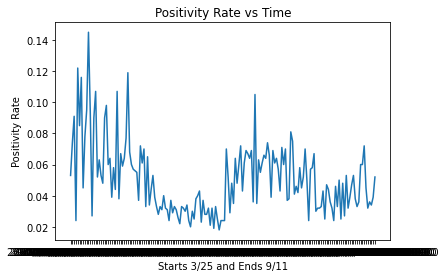

In [131]:
plt.plot(filtered_Dem_Cases["date"],filtered_Dem_Cases["test_positivity_rate"])
plt.title("Positivity Rate vs Time")
plt.xlabel("Starts 3/25 and Ends 9/11")
plt.ylabel("Positivity Rate")
plt.show()